MVPA analysis: SVM

`
Author:
Egor Ananyev
`

# Preparation

## Loading packages

In [1]:
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
import mne
import pandas as pd
import os

In [2]:
mne.set_log_level('warning')  # less verbose output

## Setting parameters

In [3]:
interactive = False  # Whether to render interactive figures such as channel plots
# ...should be set to True on first pass

debug = False

cur_subj = 1
numof_runs = 7

## Loading evoked data

In [4]:
# data_path = os.path.expanduser("C:\\Users\\egora\\Downloads\\meg\\")
data_path = os.path.expanduser('E:\\meg\\')

cur_subj_str = str(cur_subj).zfill(2)

for cur_run in range(numof_runs):
    cur_run_str = str(cur_run+1).zfill(2)
    raw_fname = os.path.join(data_path,
                             'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg\\sub-' + \
                             cur_subj_str + '_ses-meg_experimental_run-' + cur_run_str + '_proc-sss_epo.fif')
    print(raw_fname)
    epochs_run = mne.read_epochs(fname)
    # example append: https://github.com/mne-tools/mne-python/blob/master/examples/io/plot_elekta_epochs.py 
    if cur_run == 0:
        epochs = epochs_run
    else:
        epochs = epo_data.append(epochs_run)

The path to store MVPA-related data and visualization.

In [5]:
mvpa_path = os.path.join(data_path, 'derivatives\\meg_derivatives\\sub-' + cur_subj_str + '\\ses-meg\\meg-mvpa\\')
mvpa_fname = os.path.join(mvpa_path, 'sub-' + cur_subj_str + '_run-' + cur_run_str)

## Examining raw data

In [13]:
%matplotlib qt
if interactive:
    raw.plot()

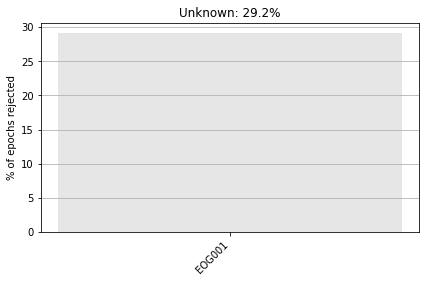

In [53]:
%matplotlib inline
epochs.plot_drop_log();

# Support Vector Machines

In [18]:
from sklearn import svm

## Logic of SVM-based classification

In [16]:
## In principle (from https://scikit-learn.org/stable/modules/svm.html):
X = [[0, 0], [1, 1], [2, 2]]  # channel measurements [n_features] on all but one trial [n_samples] at time t
y = [0, 1, 1]                 # stimulus orientation
clf = svm.LinearSVC()         # linear Support Vector Classification
clf.fit(X, y)                 # model fitting
clf.predict([[3, 3]])         # model testing on the remaining trial at time t

array([1])

In [17]:
np.shape(X)  # array of size [n_samples, n_features]

(3, 2)

## Setting up routine for time _t_

In [ ]:
def svm_routine(t, channels, stim_ori):
    

## Applying the routine to all _t_

# P.S.

In [62]:
%matplotlib
%matplotlib qt

Using matplotlib backend: Qt5Agg


In [63]:
interactive = True